#**Irrigation Optmization**

### **Steps Covered in this Tutorial**

*   Introduction
*   Essential Libraries
*   Data Preprocessing
  *   Data description
  *   Dataset Cleaning
  *   Data Visualization
*   Data Modeling
  *   Train Test Split
  *   Machine Learning (Random Forest)
  *   Model Evaluation
*   Hyperparameter Tunning
*   Model Save


# **About**

[Augmented Startups](https://www.augmentedstartups.com) provides tutorials in AI Computer Vision and Augmented Reality. With over **100K subscribers** on our channel, we teach state-of-art models and build apps and projects that solve real-world problems.

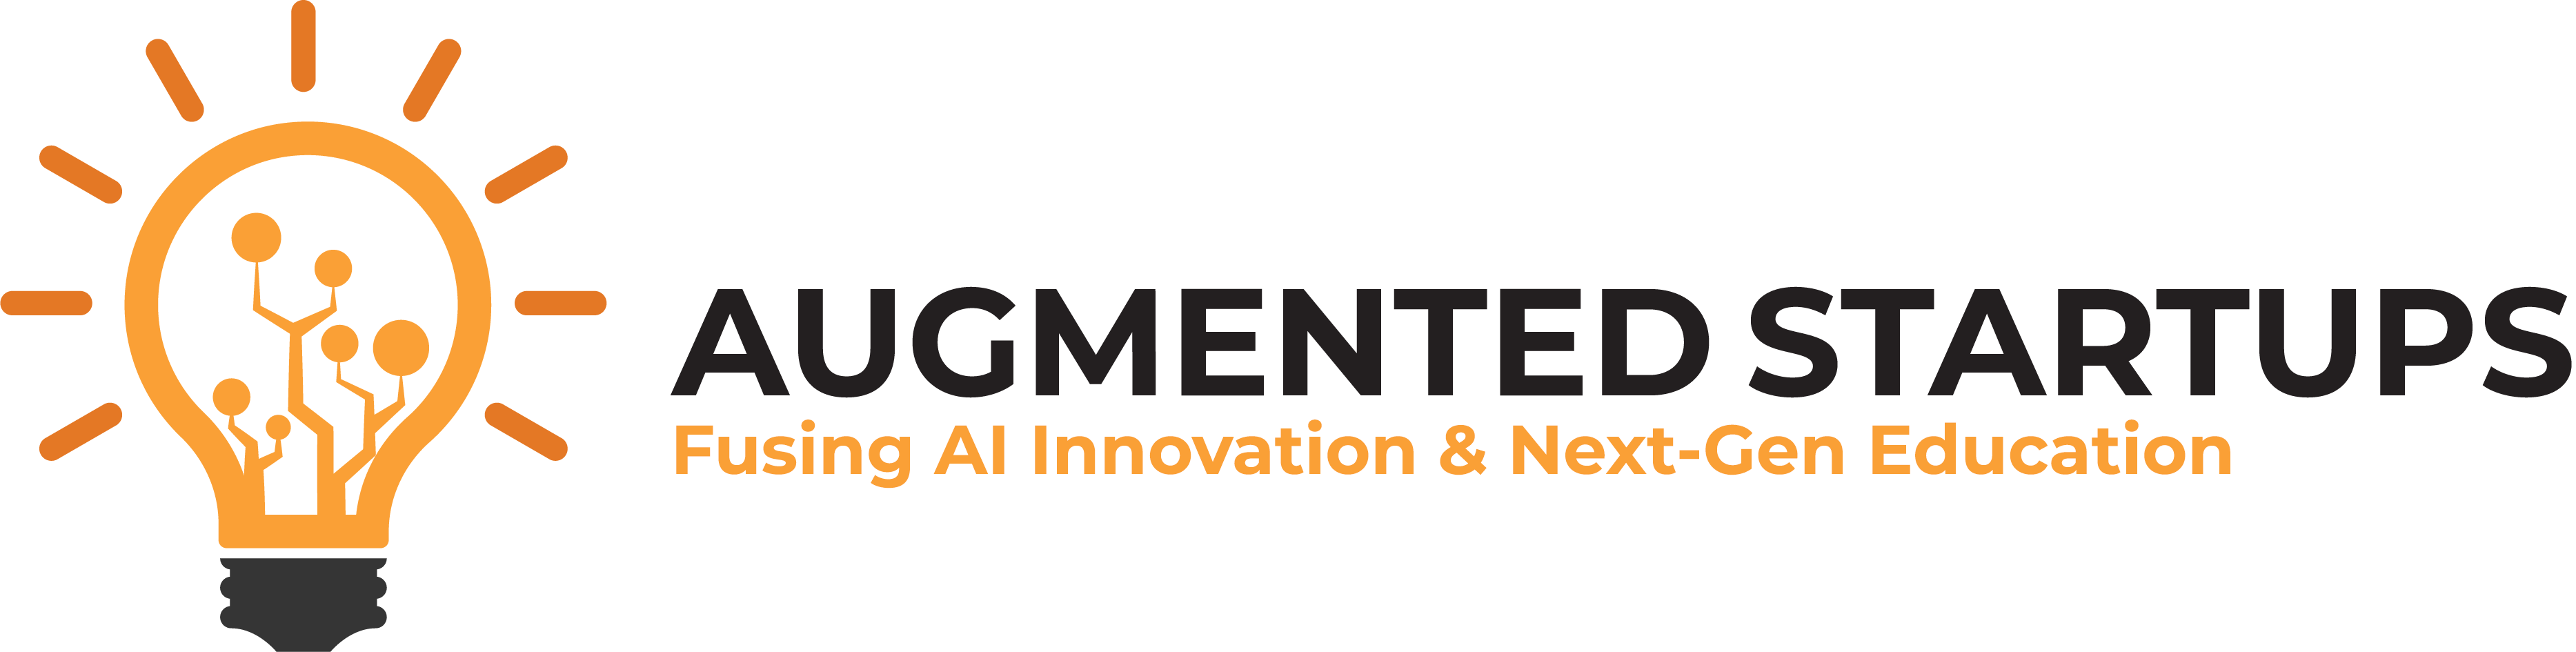)




#**Introduction**

Providing an automatic water supply system with the goal of satisfying gardeners and ensuring proper hydration for their plants is an excellent concept. This type of system can offer several benefits, both for gardeners and the plants themselves.

An automatic water supply system designed to cater to the needs of gardeners and their plants offers several significant benefits, including:

1. Water Conservation: The system can be programmed to provide precise and efficient watering, reducing water wastage by delivering the right amount of water at the right time. This helps conserve a valuable resource.

2. Time-Saving: Gardeners no longer need to manually water their plants, saving them significant time and effort. This is especially beneficial for those with busy schedules or large gardens.

3. Plant Health: The system ensures that plants receive consistent and adequate moisture, leading to healthier and more vibrant growth. This can result in increased yields for edible plants and improved aesthetics for ornamental plants.

4. Reduced Risk of Underwatering or Overwatering: The system helps prevent both underwatering and overwatering, which can be detrimental to plant health. It provides optimal hydration, reducing the risk of plant stress and diseases.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importing Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score,accuracy_score, classification_report, roc_auc_score, cohen_kappa_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Importing Dataset

In [5]:
# dataset file path
file_path = 'TARP.csv'
# Laod from the dataset
names = ['Soil Moisture', 'Temperature', ' Soil Humidity', 'Time',
         'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)',
         'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K',
         'status'
        ]
irrigation_df = pd.read_csv(file_path, names=names, header=0)

In [6]:
print(irrigation_df.shape)
irrigation_df.sample(5)
# No. of rows
print("Rows: ",irrigation_df.shape[0])

# Column names
print("Columns: ",irrigation_df.columns.tolist())

# Data types
print("Data Type: \n",irrigation_df.dtypes)

(100000, 15)
Rows:  100000
Columns:  ['Soil Moisture', 'Temperature', ' Soil Humidity', 'Time', 'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)', 'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K', 'status']
Data Type: 
 Soil Moisture            int64
Temperature              int64
 Soil Humidity           int64
Time                     int64
Air temperature (C)    float64
Wind speed (Km/h)      float64
Air humidity (%)       float64
Wind gust (Km/h)       float64
Pressure (KPa)         float64
ph                     float64
rainfall               float64
N                      float64
P                      float64
K                      float64
status                  object
dtype: object


# Dataset Description

In [7]:
data = irrigation_df
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean', '25%', '50%', '75%', 'range', 'std']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K
mean,45.484070,22.536100,45.016790,55.253650,24.263780,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091
25%,23.000000,11.000000,32.000000,28.000000,18.580000,6.830000,33.980000,21.820000,100.980000,5.971693,64.551686,21.000000,28.000000,20.000000
median,45.000000,23.000000,45.000000,55.000000,22.150000,9.530000,61.310000,37.240000,101.120000,6.425045,94.867624,37.000000,51.000000,32.000000
75%,68.000000,34.000000,58.000000,83.000000,29.590000,12.460000,86.360000,59.275000,101.260000,6.923643,124.267508,84.250000,68.000000,49.000000
range,89.000000,45.000000,50.000000,110.000000,34.340000,31.360000,95.410000,133.330000,1.360000,6.430338,278.348850,140.000000,140.000000,200.000000
std,25.993998,13.251352,14.726676,32.093033,6.756751,4.325666,30.073448,24.168987,0.218448,0.773938,54.958389,36.917334,32.985883,50.647931


# Dataset Cleaning

since the time column doesn't have enough information or the purpose of it not clear we are going to drop it

In [8]:
data.drop('Time', axis=1, inplace=True)
data.head(10)

,Soil Moisture,Temperature,Soil Humidity,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,status
0,54,22,70,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF
5,4,26,52,19.67,2.51,51.91,14.69,101.51,7.073454,251.055000,69.0,37.0,42.0,ON
6,15,34,58,19.74,2.36,50.72,11.85,101.50,5.700806,271.324860,69.0,55.0,38.0,ON
7,45,30,43,19.80,2.21,49.54,9.02,101.50,5.718627,241.974195,94.0,53.0,40.0,ON
8,47,4,42,19.91,2.46,47.70,7.23,101.50,6.685346,230.446236,89.0,54.0,38.0,OFF
9,19,41,22,20.02,2.71,45.86,5.44,101.50,6.336254,221.209196,68.0,58.0,38.0,ON


Checking Null values

In [9]:
check_for_nan = data.isnull().values.any()
sum_nan = data.isnull().sum().sum()
sum_nan_col = data.isnull().sum()
print("NaN Exist ? ", check_for_nan)
print("NaN Sum : ", sum_nan)
print("NaN Sum By Columns: \n", sum_nan_col)

NaN Exist ?  True
NaN Sum :  869025
NaN Sum By Columns: 
 Soil Moisture              0
Temperature                0
 Soil Humidity             0
Air temperature (C)    76005
Wind speed (Km/h)      76005
Air humidity (%)       76005
Wind gust (Km/h)       76005
Pressure (KPa)         76005
ph                     97800
rainfall               97800
N                      97800
P                      97800
K                      97800
status                     0
dtype: int64


Dropping those columns since they have so many NaN values

In [10]:
data.drop('ph', axis=1, inplace=True)
data.drop('rainfall', axis=1, inplace=True)
data.drop('N', axis=1, inplace=True)
data.drop('P', axis=1, inplace=True)
data.drop('K', axis=1, inplace=True)



changing status into binary


In [11]:
def status_to_binary(status):
    if status == 'ON':
        val = 1
    elif status == 'OFF':
        val = 0

    return val

In [12]:
data['status'] = data['status'].apply(status_to_binary)
data.head()

,Soil Moisture,Temperature,Soil Humidity,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),status
0,54,22,70,19.52,2.13,55.04,6.30,101.50,1
1,12,20,40,19.49,2.01,55.17,10.46,101.50,0
2,34,26,35,19.47,1.90,55.30,14.63,101.51,1
3,7,44,44,19.54,2.28,54.20,16.08,101.51,0
4,50,38,23,19.61,2.66,53.09,17.52,101.51,0


Dropping all NaN values

In [29]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

new_data = clean_dataset(data)
new_data.shape

import numpy as np

new_data = clean_dataset(data)
print(new_data.shape)

(23995, 10)


# Data Visualization

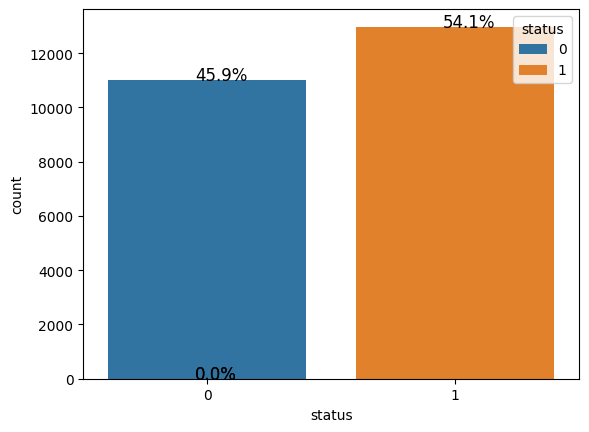

In [14]:
# status On / off
ax = sns.countplot(x="status", hue="status", data=data)
# calculate percetage
def calc_percentage(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
calc_percentage(ax, data.status)

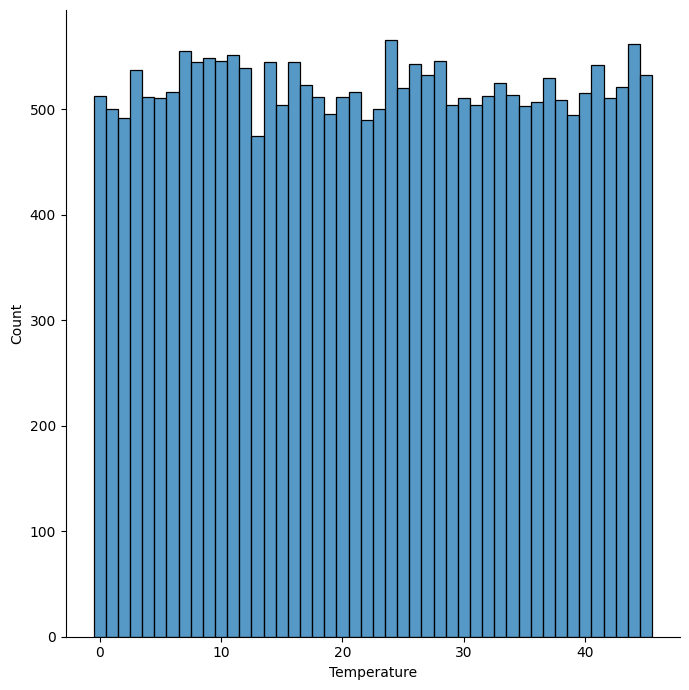

In [15]:
# Temperature Dist
sns.displot(data, x="Temperature", binwidth=3, bins=20, discrete=True, height=7)

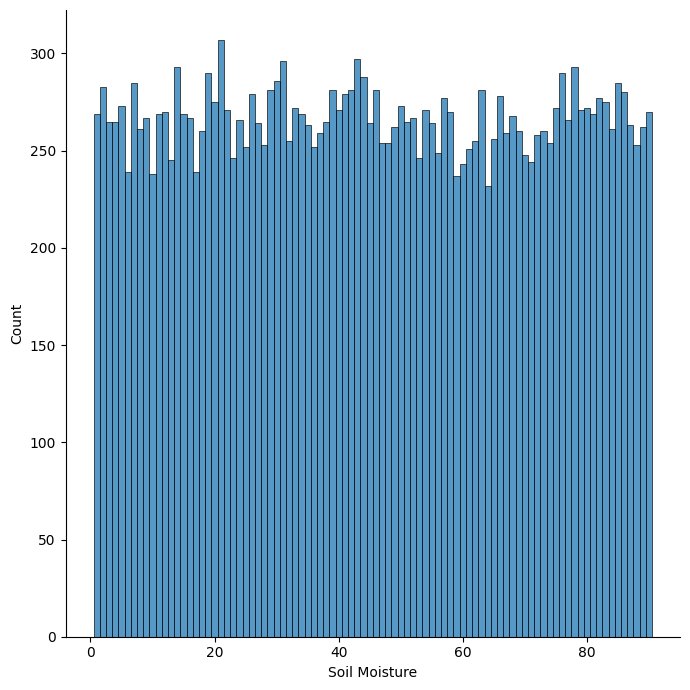

In [16]:
# Soil Moisture Dist
sns.displot(data, x="Soil Moisture", binwidth=3, bins=20, discrete=True, height=7)

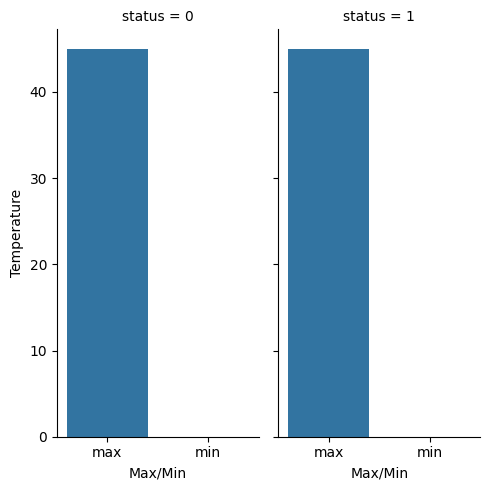

In [17]:
# On/ Off based to temperature
status_agg = data.groupby('status').agg({'Temperature': ['min', 'max']})
status_values = pd.merge(status_agg['Temperature']['max'], status_agg['Temperature']['min'],right_index=True,left_index=True )
status_values = pd.melt(status_values.reset_index(), ['status']).rename(columns={'variable':'Max/Min', 'value': 'Temperature'})
status_values.head()
g = sns.FacetGrid(status_values, col="status", height=5, aspect=.5, hue='Max/Min')
g.map(sns.barplot, "Max/Min", "Temperature", order=["max", "min"])

# Dataset Splitting "Training 70%, Testing 30%"

In [30]:
# 8 feauture
X = new_data.iloc[:, :-1].values
print(X.shape)
# status
y = new_data["status"].values
print(y.shape)

(23995, 9)
(23995,)


In [31]:
# splitting dataset Train, Test (70%, 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

In [32]:
data = data.reset_index()

# Random Forest

In [33]:
# Train RF model
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [34]:
# Predict
y_pred_RF = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

[[2216 1082]
 [ 922 2979]]
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69      3298
         1.0       0.73      0.76      0.75      3901

    accuracy                           0.72      7199
   macro avg       0.72      0.72      0.72      7199
weighted avg       0.72      0.72      0.72      7199

Accuracy: 0.721628003889429
Precision: 0.7210194553671405
Recall: 0.721628003889429
F1 Score: 0.720964823224926
Cohen Kappa Score: 0.4372120776534263


# Setting the right Hyperparameters

In [35]:
RF_classifier = RandomForestClassifier(n_estimators = 200, max_depth=80, bootstrap=False, max_features='sqrt', random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [36]:
print('Performance of RF Algorithm - After Hyperparamter Tuning:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm - After Hyperparamter Tuning:

[[2156 1142]
 [ 833 3068]]
              precision    recall  f1-score   support

         0.0       0.72      0.65      0.69      3298
         1.0       0.73      0.79      0.76      3901

    accuracy                           0.73      7199
   macro avg       0.73      0.72      0.72      7199
weighted avg       0.73      0.73      0.72      7199

Accuracy: 0.7256563411584942
Precision: 0.7253374424610273
Recall: 0.7256563411584942
F1 Score: 0.7241402323101126
Cohen Kappa Score: 0.44340539311744465


# ROC Curve

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.

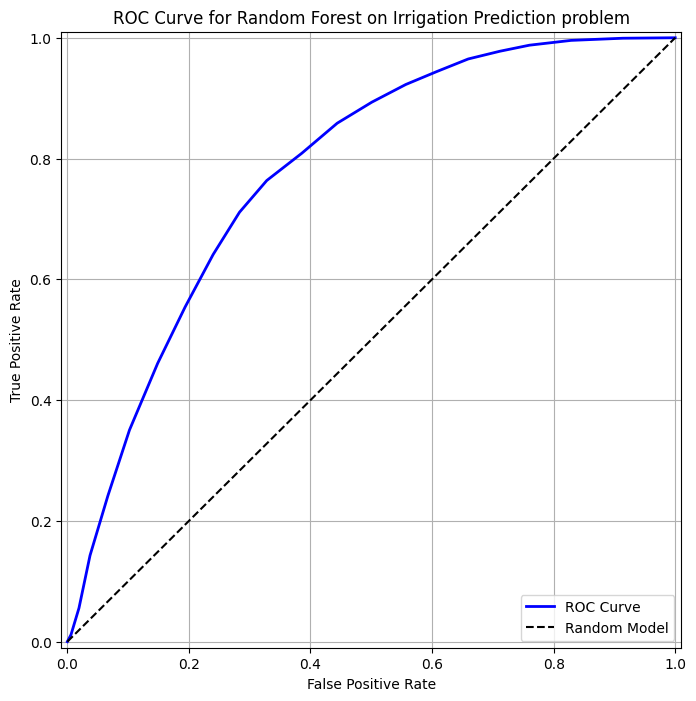

In [37]:
def plot_roc(y_test, y_pred, model_name):
    # False Positive Rate, True Positive Rate, Threshold
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='b', linewidth=2, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for {} on Irrigation Prediction problem'.format(model_name))
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

y_pred_prob_rf = rf_model.predict_proba(X_test)
plot_roc(y_test, y_pred_prob_rf[:, 1], 'Random Forest')


# Saving Model

In [38]:
#Exporting the trained model as a pickle file for API integration
joblib.dump(RF_classifier, 'model1.pkl')

['model1.pkl']